
<center>
    <h1> INF285/ILI285 Computación Científica </h1>
    <h1> Tarea N°1, v1.00 </h1>
    
</center>

<p>

</p>

## Instrucciones

* La tarea es individual.
* Las consultas sobre las tareas se deben realizar por medio de la plataforma Aula.
* La tarea debe ser realizada en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, entre otras, así como la correcta implementación de algoritmos de forma vectorizada.
*  **El archivo de entrega debe denominarse ROL-tarea-numero.ipynb**. _De no respetarse este formato existirá un descuento de **50 puntos**_
* La fecha de entrega es el jueves 30 de Abril a las **18:00 hrs**.  Se aceptarán entregas hasta las 19:00 hrs sin descuento en caso de existir algun problema, posteriormente existirá un descuento lineal hasta las 20:00 hrs del mismo día.
* Las tareas que sean entregadas antes del jueves a mediodía recibirán una bonificación de 10 puntos
* Debe citar cualquier código ajeno utilizado (incluso si proviene de los Jupyter Notebooks del curso).




## Introducción 

En esta primera tarea de INF/ILI-285, versión 2020-1, estudiaremos la importancia de los primeros temas estudiados en el curso, los cuales son: Representación de Punto Flotante, Pérdida de Significancia, Errores de Cancelación y Búsqueda de Ceros. El desarrollo de cada uno de esos temas se presenta en una serie de preguntas, donde ustedes deben ir decidiendo, pregunta a pregunta, como cada uno de los temas se aplica. En general, los temas no se analizan por separado, sino de manera acoplada. Es muy importante que cada uno de los problemas sea analizado teóricamente primero, para luego poner su conocimiento en acción. Cada problema puede ser desarrollado de diversas formas, sin embargo, es muy importante determinar al final si el camino elegido resuelve la pregunta presentada.

## Problemas

### 1. Simulador (50 ptos) 

Dada la familia de polinomios de grado 3 con la forma:


\begin{equation}
f(x)=x^3 - A\,x^2 + A\,x - 1
\end{equation}


Se pide implementar un algoritmo que reciba como parámetros el valor de $A$ (con $|A|>>1$) y la cantidad de bits que tiene en la mantisa un computador ficticio, el manejo del exponente debe considerarse de las misma forma que lo maneja _double precision_.
Esta implementación debe calcular las raíces de $f$ sin perdida de significancia con la cantidad de bits disponibles para la mantisa.
Para obtener las raíces de $f$ usted debe encontrar de forma algebraica sus raíces y luego proponer un algoritmo basado en las _fórmulas_ obtenidas.

Considere que en ese computador ficticio cuenta con las operaciones matemáticas necesarias para obtener las raíces.  Considere el siguiente ejemplo:

```python
# Alg. Base
a = 9819824.624837
b = 148736.523476
c = a+b

# Alg. con Representación de Punto Flotante de 'bits_mant' bits en la mantisa.
am = f_new_rep(9819824.624837,bits_mant) # Aproximar el input en la nueva representación.
bm = f_new_rep(148736.523476,bits_mant) # Aproximar el input en la nueva representación.
cm = f_new_rep(m,exp,am+bm) # Aproximar el output de la suma y cada operación en la nueva representación.
```


### 1.1 Desarrollo
Para encontrar la raíz de la familia de polinomios, primero se procede a factorizar

\begin{equation}
x^3 - Ax^2 + Ax -1 \\
(x^3-1) - Ax(x-1) \\
(x-1)(x^2 +x + 1) - Ax(x-1) \\
(x-1)(x^2 - Ax + x + 1) \\
(x-1)(x^2 + (1-A)x + 1) \\
\end{equation}

Por lo tanto, se puede notar que una raíz del ejercicio siempre será 1, y se quiere estudiar la otra raíz. Se procede a aplicar la fórmula para encontrar 0s en raíces cuadráticas, 
por lo que se procede a usar lo escrito en el libro [1]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import bitstring as bs

ModuleNotFoundError: No module named 'bitstring'

In [ ]:
"""
input
x         : (double) valor a evaluar
bits_mant : (int) cantidad de bits de la mantisa
output
eval      : (double) resultado obtenido
"""
def f_new_rep(x: float, bits_mant: int):
    b = bs.pack('>d', x)
  
    if bits_mant >= 51:
        raise Exception('Cannot be represented')

    sign = b[0]
    exp = b[1:12].uint
    mantissa = b[12:]
    
    last_value = b[12 + bits_mant]
    # Cuando el bit siguiente es 0, todo el resto sera 0
    if not last_value:
        n_mantissa = b[12:12 + bits_mant].uint
        
    # En el caso de que el 53 sea 0, pero no todo el resto son 0, se suma 1 a la mantissa
    elif b[12 + bits_mant + 1:].uint > 0:
        n_mantissa = b[12:12 + bits_mant].uint + 1
        
    # En el caso de que todo el resto sea 0, pero el b52 es 1: 
    elif b[12 + bits_mant - 1]:
        n_mantissa = b[12:12 + bits_mant].uint + 1

    # Si no se cumple ninguna de las anteriores, se trunca igual.
    else:
        n_mantissa = b[12:12 + bits_mant].uint
        
    if n_mantissa > 2**bits_mant - 1:
        n_mantissa = 0
        exp += 1
    
    n_mantissa = bs.pack(f'uint:{bits_mant}', n_mantissa)
    s_exp = bs.pack(f'uint:11', exp)
    s_mantissa = n_mantissa.bin + '0'*(52 - bits_mant)
    
    new_float = bs.BitArray(length=64)
    new_float.bin = str(int(sign)) + s_exp.bin + s_mantissa
    
#     print(new_float.bin[0], new_float.bin[1:12], new_float.bin[12:])
    return new_float.float

def f_find_roots(A, bits_mant):
    # Algoritmo para encontrar raíces de f(x).
    A = f_new_rep(A, bits_mant)
    a = f_new_rep(1., bits_mant)
    b = f_new_rep(1. - A, bits_mant)
    c = f_new_rep(1., bits_mant)
    print(A, b, c)
    det = np.power(b, 2) - 4*a*c
    # Ya que |A| >> 1, eso implica que b^2 >> 4|ab|, por lo
    # que segun el libro guia, esto podria llevar perdida de significancia.
    # Por lo tanto se dan dos soluciones alternativas dependiendo
    # del signo de b
    if b > 0:
        x1 = -(b+np.sqrt(det))/(2*a)
        x2 = -(2*c)/(b + np.sqrt(det))
    else:
        x1 = (-b + np.sqrt(det))/(2*a)
        x2 = (2*c)/(-b + np.sqrt(det))
    
    x1 = f_new_rep(x1, bits_mant)
    x2 = f_new_rep(x2, bits_mant)
    return [1, x1, x2]

### Polinomios de Legendre (50 puntos)
Dada la función compuesta $f$
\begin{equation}
f_{n,m}(x) = L_n(C_m(x)),
\end{equation}
donde $L_n$ es conocido como el polinomio de Legendre de grado $n$ definido de la siguiente forma:
\begin{equation}
L_{n}(x)=\frac{1}{2^{n}} \sum_{k=0}^{n}\left(\begin{array}{l}
n \\
k
\end{array}\right)^{2}(x-1)^{n-k}(x+1)^{k},
\end{equation}
y $C_m$ es el polinomio de Chebyshev
\begin{equation}
C_m(x) = \cos(m \cdot \arccos(x)).
\end{equation}

Utilizando el método de Bisección y Punto fijo se pide obtener la raíz de $f$ más cercana a $0.5$ dado un valor de $m$ y $n$



*Hint: Las raíces de Legendre son conocidas*



### Desarrollo

Para el caso de la Bisección, como las raíces de legendre son conocidas, bastaría con encontrar los 0s de la función $C_m(x) - r$ donde $r$ es una raíz de Legendre.
Luego, se pueden calcular las extremas del polinomio de Chebyshev al ser combinación de funciones sinusoidales, ocupando la fórmula presente en [2], se procede
a calcular las extremas, y luego se busca el 0 entre 2 extremas de chebyshev por cada raíz de Legendre, lo que curiosamente da un total de $n\times m$ raíces.

Para el caso de la iteración de punto fijo, se procede a hacer un desarrollo algebraico con el fin de encontrar una función de punto fijo que se pueda iterar:


\begin{align}
\cos(m \times \arccos(x)) - r &= 0 \\
m \times \arccos(x) &= \arccos(r) \\
\arccos(x) &= \frac{\arccos(r)}{m} \\
x &= \cos\left(\frac{\arccos(r)}{m}\right) \qquad \text{Luego, se debe llevar a la forma } x = g(x) \text{ Por lo tanto, se le suma +x} \\
2x &= \cos\left(\frac{\arccos(r)}{m}\right) + x \\
x &= \frac{1}{2}\left(\cos\left(\frac{\arccos(r)}{m}\right) + x\right)
\end{align}

Y como se puede apreciar, esta función es linealmente creciente por lo tanto no habría problemas al utilizar la iteración de punto fijo

-0.8611363115940526
-0.7294427366909657 -0.4259873999759787


/home/etra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/etra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


(-1, 1)

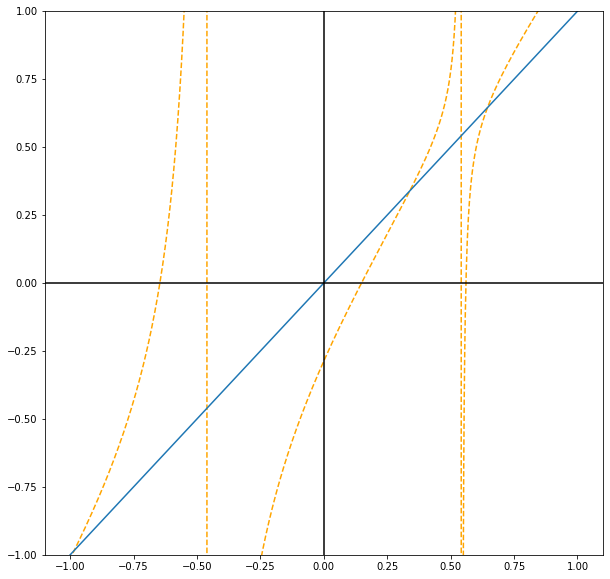

In [85]:
x = np.linspace(-1, 1, 1_000)
m = 3
n = 4

tf = lambda x: legendre(n)(chebyshev_pol(m, x))
fig, ax = plt.subplots(figsize=(10, 10))

for r in roots_legendre(n)[0]:
    dcheb = lambda x: x - m*np.sin(m*np.arccos(x))/np.sqrt(1-x**2)
    f = lambda x: x - (chebyshev_pol(m, x) - r)/dcheb(x)
    
    ax.plot(x, f(x), color='orange', ls='--')
    ax.plot(x, x)
    
    print(r)
    arr = fpi(tf, f, r, 1e-5)
#     print(arr)
    
    a, b = list(zip(*arr))
    ax.plot(a, b, color='black', lw=0.8, ls='--', alpha=1)
    print(b[-1], tf(b[-1]))
#     ax.scatter(a, b, marker='x', color=[cmap(i) for i in np.linspace(0, 1, len(a))])
#     ax.plot(x, chebyshev_pol(m, x), color='blue', ls='-')
    break
    

# ax.plot(x, tf(x), color='purple')



ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.set_ylim(-1, 1)

A continuación se presenta el código para ambos casos

/home/etra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in arccos


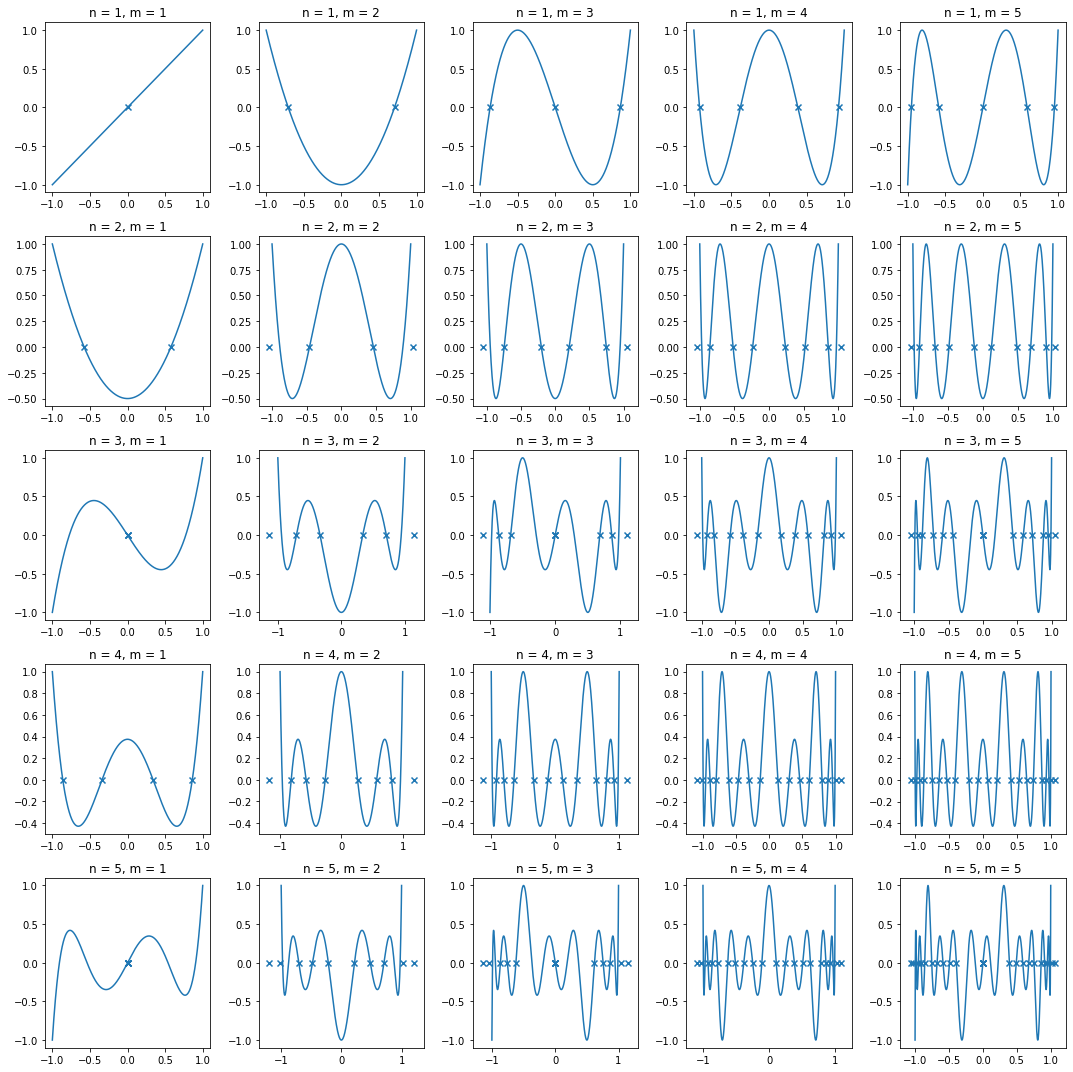

In [102]:
from scipy.special import legendre, roots_legendre
"""
input
n: (int) grado del polinomio de Legendre
m: (int) grado del polinomio de Chebyshev
tol: (double) tolerancia para la detención del algoritmo
output
root: (double) raiz obtenida
"""

# Codigo reutilizado del desafio 1 (codigo propio)
def bisection(f, a, b, tol):
    c_value = (a+b)/2
    if f(a)*f(b) > 0:
        raise Exception("There's no root")
    
    while np.abs(f(c_value)) > tol:
        c_value = (a+b)/2
        
        if f(a)*f(c_value) <= 0: b = c_value
        else: a = c_value
        
    return c_value

def chebyshev_pol(m, x):
    return np.cos(m*np.arccos(x))

def chebyshev_roots(n):
    arr = np.arange(n+1, dtype=float)
    return np.cos((2*arr + 1)*np.pi/2)

def chebyshev_extremas(n):
    arr = np.arange(n+1, dtype=float)
    calc = np.cos((arr/n)*np.pi)
    return calc

def legendre_nearest_root(n, value):
    roots = roots_legendre(n)[0]
    idx = (np.abs(roots - value)).argmin()
    nearest_value = roots[idx]
    return nearest_value

def f_Biseccion(n, m, tol):
    roots = []
    extremas = chebyshev_roots(m)
    for r in roots_legendre(n)[0]:
        f = lambda x: chebyshev_pol(m, x) - r
        for j in range(len(extremas) - 1):
            a, b = extremas[j:j+2]
            root = bisection(f, a, b, tol)
            roots.append(root)

    # Seleccionar el valor mas cercano a 0.5
    
    roots = np.array(roots)
    print('roots bis', roots)
    idx = (np.abs(roots - 0.5)).argmin()
    return roots[idx]

# Codigo reutilizado del desafio 1 (codigo propio)
def fpi(f, g, x_0, tol):
    x = []
    c_value = x_0
    i = 0
    while np.abs(f(c_value)) > tol:   
        c_value = g(c_value)

        # Caso cuando el valor ya no se actualice, sea
        # muy grande, o simplemente nan o inf, se retorna antes
        # de agregar un nuevo valor.
        if len(x) > 0 and \
        (c_value == x[-1] or np.abs(c_value) > 1.7e100 or 
         np.isnan(c_value) or np.isinf(c_value)): return x
        
        x.append(c_value)
    return c_value

# Lamentablemente, no logre encontrar la raiz mas cercana a 0.5
# Solo logre calcular algunas raices, no pude lograr que convergiera especificamente a la raiz cercana
# a 0.5
def f_FPI(n, m, tol):
    roots = []
    extremas = chebyshev_extremas(m)
    for r in roots_legendre(n)[0]:
#         f = lambda x: chebyshev_pol(m, x) - r
        f = lambda x: legendre(n)(chebyshev_pol(m, x))
        dcheb = lambda x: m*np.sin(m*np.arccos(x))/np.sqrt(1-x**2)
        g = lambda x: x - (chebyshev_pol(m, x) - r)/dcheb(x)
        
        for j in range(len(extremas) - 1):
            a, b = extremas[j:j+2]
            root = fpi(f, g, (a+b)/2, tol)
            roots.append(root)
    roots = np.array(roots)
#     print(roots)
    idx = (np.abs(roots - 0.5)).argmin()
    return roots

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
f = lambda x, n, m: legendre(n)(chebyshev_pol(m, x))
x = np.linspace(-1, 1, 1000)
for i in range(0, 5):
    for j in range(0, 5):
        roots = f_FPI(i+1, j+1, 1e-12)
        ax[i, j].plot(x, f(x, i+1, j+1))
        ax[i, j].set_title(f"n = {i+1}, m = {j+1}")
        ax[i, j].scatter(roots, np.zeros_like(roots), marker='x')

fig.tight_layout()


###  Determinantes (20 puntos)

Dada una matriz de dimensiones $ n \times n$ de la forma:
\begin{equation}
A
=
\begin{pmatrix}
a_{1,1} & a_{1,2}  & \dots & a_{1,n} \\
a_{2,1} & a_{2,2}  & \dots & a_{2,n} \\
\vdots &  \vdots   & \ddots & \vdots \\
a_{n,1} & a_{n,2}  & \dots & a_{n,n}
\end{pmatrix}
=
\begin{pmatrix}
\mathbf{r}_1 \\
\mathbf{r}_2 \\
\vdots \\
\mathbf{r}_n \\
\end{pmatrix},
\end{equation}
donde $\mathbf{r}_k$ representa la $k$-ésima fila de la matriz $A$.
Considere la siguiente matriz $C_{i,j}(\alpha)$,
\begin{equation}
C_{i,j}(\alpha)
=
\begin{pmatrix}
\mathbf{r}_1 \\
\vdots \\
\mathbf{r}_i\,(1-\alpha)+\mathbf{r}_j\,\alpha \\
\vdots \\
\mathbf{r}_j\,(1-\alpha)+\mathbf{r}_i\,\alpha \\
\vdots \\
\mathbf{r}_n \\
\end{pmatrix},
\end{equation}
de lo cual sabemos que $C_{i,j}(0)=A$ y que $C_{i,j}(1)$ es la matriz $A$ donde se intercambiaron las filas $i$ y $j$, es decir:
\begin{equation}
C_{i,j}(1)
=
\begin{pmatrix}
\mathbf{r}_1 \\
\vdots \\
\mathbf{r}_j \\
\vdots \\
\mathbf{r}_i \\
\vdots \\
\mathbf{r}_n \\
\end{pmatrix}.
\end{equation}
De las relaciones anteriores podemos concluir que el determinante de la matriz $A$, denominado $D=\det(A)$, es igual al determinante de $C_{i,j}(0)$, es decir $\det(C_{i,j}(0))=\det(A)=D$.
Por el otro lado, el determinante de $C_{i,j}(1)$ es $-D$, dado que es el intercambio de las filas $i$ y $j$ de la matriz $A$.
Por lo cual podemos concluir que $-D\leq \det(C_{i,j}(\alpha))\leq D$.

Utilizando el método de Bisección debe encontrar el valor de $\alpha$ con $p$ decimales de precisión que permitan que, dado los índices de las filas $i$, $j$, y $i\neq j$, el determinante de la matriz sea igual a $d$, donde $d\in[-D,D]$. 

Para esto se debe implementar una función que reciba la matriz $A$, las filas $i$ y $j$, y $p$; y retorne $\widehat{\alpha}$ tal que $\det(C_{i,j}(\widehat{\alpha}))=d$.


### Desarrollo

Para este caso, simplemente había que transformar la función a $\det(C_{i,j}(x)) - d$ y encontrar sus raíces, para esto se reutilizó la función de bisección diseñada previamente

In [5]:
"""
input
A: (array n x n) matriz
i: (int) índice de la fila "i".
j: (int) índice de la fila "j".
p: (int) cantidad de decimales de precision 
d: (double) valor requerido del determinante de $C_{i,j}(\alpha)$, i.e. $\det(C_{i,j}(\widehat{\alpha}))=d$.
output
alpha_hat: (double) alpha_hat tal que det(C_{i,j}(alpha_hat))=d.
"""

def c_ij(x, i, j, a):
    x = x.copy()
    x[i,:], x[j,:] = (x[i,:]*(1 - a) + x[j,:]*a), (x[j,:]*(1 - a) + x[i,:]*a)
    return x


def find_alpha_hat(A, i, j, p, d):
    det = np.linalg.det(A)
    test_function = lambda x: np.linalg.det(c_ij(A, i, j, x)) - d
    alpha_hat = bisection(test_function, -det, det, 10**(-p))
    return alpha_hat

A = np.array([[25,100,100],[20,50,20],[40,40,40.]])
sol = find_alpha_hat(A, 0, 1, 10, 2)
print(np.linalg.det(c_ij(A, 0, 1, sol)))

2.0000000000268408


# Referencias
[1] _Numerical Analysis_, _Sauer T._, page 18.

[2] Chebyshev Polynomials, Wikipedia, https://en.wikipedia.org/wiki/Chebyshev_polynomials#Roots_and_extrema